```python
# Uncomment and run the commands below if imports fail
# !conda install numpy pytorch torchvision cpuonly -c pytorch -y
# !pip install matplotlib --upgrade --quiet
```

In [1]:
# !conda install torchvision cpuonly -c pytorch -y

In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [3]:
# Look at the size of the dataset
len(dataset)

60000

In [4]:
# Load an additonal test set of 10,000 images.
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x155B96248B0>, 5)

Let's look at an example of element from the dataset.

Label: 3


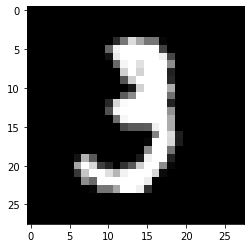

In [6]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print("Label:", label)

In [7]:
# Convert images to tensor
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

Check shape of the tensor

In [8]:
img_tensor, label = dataset[1]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 0


Let's look at the tensor it self

In [9]:
print(img_tensor[:, 10:15, 10:15])

tensor([[[0.9333, 0.9882, 0.9882, 0.7020, 0.0471],
         [0.9922, 0.9137, 0.8157, 0.3294, 0.0000],
         [0.9412, 0.2784, 0.0745, 0.1098, 0.0000],
         [0.2471, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]])


And max/min values

In [10]:
print(torch.max(img_tensor), torch.min(img_tensor))

tensor(1.) tensor(0.)


Plot part of whole image by passing peace of the tensor

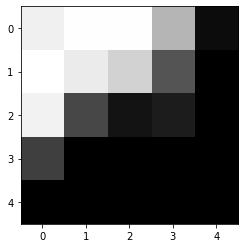

In [11]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray');

In [12]:
# Split dataset of train and validation sets
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [13]:
# Create batches
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [14]:
# Model
input_size = 28 * 28
num_classes = 10

model = nn.Linear(input_size, num_classes)
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0353,  0.0323, -0.0115,  ...,  0.0018,  0.0050,  0.0056],
        [-0.0064,  0.0202,  0.0136,  ..., -0.0049,  0.0300,  0.0160],
        [-0.0299, -0.0268, -0.0030,  ..., -0.0296,  0.0173, -0.0267],
        ...,
        [ 0.0215, -0.0165,  0.0080,  ...,  0.0037, -0.0345, -0.0320],
        [-0.0093,  0.0176,  0.0098,  ..., -0.0002,  0.0145, -0.0230],
        [ 0.0331, -0.0238, -0.0339,  ..., -0.0129, -0.0320,  0.0177]],
       requires_grad=True)

In [15]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0011,  0.0076, -0.0045, -0.0336, -0.0355,  0.0044, -0.0340, -0.0185,
        -0.0113,  0.0030], requires_grad=True)

In [16]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([5, 6, 7, 7, 7, 5, 6, 8, 3, 6, 9, 9, 9, 3, 8, 2, 5, 1, 6, 0, 3, 5, 2, 2,
        9, 9, 8, 7, 0, 5, 8, 4, 3, 6, 9, 2, 1, 5, 9, 4, 1, 5, 7, 7, 7, 7, 5, 7,
        9, 4, 3, 7, 1, 5, 8, 8, 4, 9, 1, 4, 8, 6, 0, 1, 7, 6, 6, 9, 2, 0, 3, 3,
        8, 1, 3, 4, 7, 2, 3, 3, 9, 6, 6, 3, 7, 4, 4, 8, 9, 0, 9, 5, 3, 4, 1, 9,
        7, 7, 1, 1, 6, 2, 3, 7, 1, 2, 2, 6, 2, 6, 5, 9, 7, 4, 8, 2, 6, 9, 4, 3,
        0, 8, 5, 8, 6, 6, 5, 1])
torch.Size([128, 1, 28, 28])


RuntimeError: size mismatch, m1: [3584 x 28], m2: [784 x 10] at C:\Users\builder\AppData\Local\Temp\pip-req-build-e5c8dddg\aten\src\TH/generic/THTensorMath.cpp:136

In [21]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    

model = MnistModel()

print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0125, -0.0335,  0.0316,  ..., -0.0245, -0.0088,  0.0108],
         [-0.0226, -0.0061,  0.0032,  ..., -0.0021, -0.0079, -0.0156],
         [ 0.0324, -0.0249, -0.0017,  ...,  0.0216,  0.0262,  0.0288],
         ...,
         [ 0.0249,  0.0236, -0.0169,  ...,  0.0304,  0.0215, -0.0083],
         [-0.0013,  0.0237, -0.0110,  ..., -0.0188,  0.0128, -0.0238],
         [ 0.0330, -0.0250, -0.0276,  ..., -0.0151, -0.0261, -0.0153]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0339,  0.0047,  0.0338,  0.0176, -0.0134,  0.0276, -0.0349,  0.0020,
         -0.0182, -0.0331], requires_grad=True)]

New custom model can be used in the exact same way as before. Let's see if it works.

In [22]:
for images, labels in train_loader:
    outputs = model(images)
    break
    

print("outputs.shape: ", outputs.shape)
print("Sample uptputs:\n", outputs[:2].data)

outputs.shape:  torch.Size([128, 10])
Sample uptputs:
 tensor([[-0.0056, -0.1974, -0.3899, -0.3113,  0.1943, -0.2079,  0.1335,  0.0008,
         -0.1236,  0.0335],
        [-0.2186, -0.2254, -0.1377, -0.2104,  0.1156, -0.0358,  0.3162,  0.1360,
          0.0913, -0.1107]])


In [23]:
# def softmax(y):
#     exp_sum = torch.sum(torch.exp(y), axis=1)
#     return torch.exp(y) / exp_sum.reshape(-1, 1)

# test_softmax = softmax(outputs.data)

probs = F.softmax(outputs, dim=1)
# test_softmax - probs

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1068, 0.0881, 0.0727, 0.0787, 0.1304, 0.0872, 0.1227, 0.1075, 0.0949,
         0.1110],
        [0.0813, 0.0808, 0.0882, 0.0820, 0.1136, 0.0977, 0.1389, 0.1160, 0.1109,
         0.0906]])
Sum:  1.0


In [24]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 6, 7, 7, 6, 6, 6, 7, 7, 9, 6, 7, 7, 0, 7, 7, 9, 6, 4, 9, 6, 4, 1, 4,
        0, 7, 2, 4, 6, 3, 9, 4, 6, 6, 6, 0, 4, 6, 6, 4, 6, 7, 1, 7, 4, 1, 6, 6,
        6, 0, 6, 6, 7, 4, 7, 4, 7, 6, 7, 0, 7, 6, 0, 7, 0, 6, 0, 0, 0, 6, 7, 6,
        7, 6, 0, 2, 6, 8, 6, 4, 0, 7, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 4, 7, 2, 4,
        6, 6, 6, 4, 7, 8, 4, 6, 7, 7, 6, 0, 7, 6, 7, 4, 0, 7, 7, 4, 9, 6, 7, 6,
        7, 6, 6, 6, 3, 6, 6, 7])
tensor([0.1304, 0.1389, 0.1299, 0.1363, 0.1425, 0.1201, 0.1248, 0.1362, 0.1218,
        0.1203, 0.1253, 0.1274, 0.1350, 0.1245, 0.1250, 0.1406, 0.1332, 0.1290,
        0.1137, 0.1339, 0.1419, 0.1266, 0.1303, 0.1290, 0.1206, 0.1272, 0.1169,
        0.1434, 0.1206, 0.1219, 0.1286, 0.1476, 0.1223, 0.1442, 0.1232, 0.1598,
        0.1304, 0.1497, 0.1263, 0.1321, 0.1515, 0.1179, 0.1354, 0.1464, 0.1384,
        0.1108, 0.1090, 0.1379, 0.1290, 0.1250, 0.1188, 0.1277, 0.1365, 0.1194,
        0.1224, 0.1369, 0.1242, 0.1304, 0.1150, 0.1547, 0.1295, 0.1264, 0.1263,
       

In [25]:
labels

tensor([2, 7, 9, 4, 7, 7, 3, 6, 4, 9, 8, 9, 6, 8, 4, 4, 6, 3, 1, 5, 4, 3, 0, 9,
        1, 2, 1, 2, 7, 3, 5, 5, 9, 9, 7, 8, 5, 4, 4, 0, 4, 6, 0, 6, 3, 5, 1, 5,
        2, 0, 1, 7, 7, 1, 7, 0, 8, 7, 1, 8, 2, 5, 1, 4, 8, 4, 5, 8, 8, 9, 9, 8,
        0, 4, 1, 2, 8, 4, 8, 8, 5, 4, 3, 4, 1, 7, 4, 8, 2, 8, 2, 9, 0, 6, 5, 1,
        7, 0, 8, 0, 6, 8, 0, 7, 9, 6, 9, 8, 5, 3, 6, 5, 1, 8, 9, 8, 3, 9, 1, 4,
        3, 5, 0, 5, 3, 3, 3, 6])

Now it is not a good predicting. It's because was used only random initialization.

## Evaluation Metric and Loss Function

***Evalution Metric:***

I use **accuracy** as mesure how well is prediction. It can be done with softmax function. But I use simplify estimate because it equivalent for my goal (equivalent relation for linear function and exponential function $\leftrightarrow$ if linear function grows-up, then exponential function grows-up, if linear down, exp down). 


$\mathbb{1}$  - indicator-function.

$$\mathbb{1}_i =\begin{equation}
\left\{ 
  \begin{array}\\
    1 & \mbox{if } \hat{y} = y\\
    0 & \mbox{if } \hat{y} \neq y\\
  \end{array}
  \right.
\end{equation}
$$

$$accuracy = \frac{1}{m}\sum_{i=1}^{m} \mathbb{1}_i
$$

<!-- HIDE
$$L =\begin{equation}
\left\{ 
  \begin{aligned}
    1,\space \text{ if }\ \hat{y} = y\\
    -x&+8\,y&   &=&3\\
  \end{aligned}
  \right.
\end{equation}
$$ -->

In [26]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

Get accuracy of the current model

In [27]:
accuracy(outputs, labels)

tensor(0.0625)

***Loss function:***

In [28]:
loss_fn = F.cross_entropy

In [29]:
# Loss for current betch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3242, grad_fn=<NllLossBackward>)


### Training the model
**Structure:**
```python
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients

    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics

    # Log epoch, loss & metrics for inspection
```

In [37]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine loss
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
        
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, 
                                                                     result['val_loss'], 
                                                                     result['val_acc']))
        
model = MnistModel()

In [38]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, bal_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        
        # train 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        # validation
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [39]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3128445148468018, 'val_acc': 0.09414556622505188}

In [40]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9476, val_acc: 0.6044
Epoch [1], val_loss: 1.6789, val_acc: 0.7114
Epoch [2], val_loss: 1.4781, val_acc: 0.7553
Epoch [3], val_loss: 1.3262, val_acc: 0.7801
Epoch [4], val_loss: 1.2091, val_acc: 0.7977


In [41]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1169, val_acc: 0.8084
Epoch [1], val_loss: 1.0428, val_acc: 0.8170
Epoch [2], val_loss: 0.9821, val_acc: 0.8244
Epoch [3], val_loss: 0.9317, val_acc: 0.8281
Epoch [4], val_loss: 0.8889, val_acc: 0.8335


In [42]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8523, val_acc: 0.8356
Epoch [1], val_loss: 0.8206, val_acc: 0.8387
Epoch [2], val_loss: 0.7928, val_acc: 0.8410
Epoch [3], val_loss: 0.7683, val_acc: 0.8441
Epoch [4], val_loss: 0.7465, val_acc: 0.8474


In [43]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7270, val_acc: 0.8497
Epoch [1], val_loss: 0.7093, val_acc: 0.8519
Epoch [2], val_loss: 0.6934, val_acc: 0.8527
Epoch [3], val_loss: 0.6788, val_acc: 0.8544
Epoch [4], val_loss: 0.6655, val_acc: 0.8562


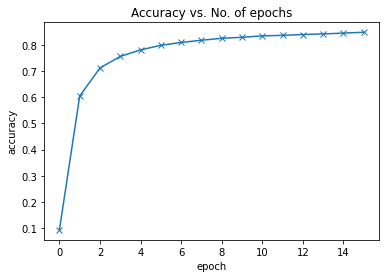

In [45]:
history = [result0] + history1 + history2 + history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');